In [1]:
import networkx as nx
import pandas as p
import matplotlib.pyplot as pt
import seaborn as sb

In [2]:
df_users = p.read_csv("users.csv")
df_friendships = p.read_csv("friendships.csv")

In [3]:
df_users 

,id,name,age,location
0,1,Alice,25,New York
1,2,Bob,30,Los Angeles
2,3,Charlie,22,Chicago
3,4,David,28,Houston
4,5,Eve,27,San Francisco
5,6,Frank,35,Miami
6,7,Grace,26,Seattle


In [4]:
df_friendships

,from,to
0,1,2
1,1,3
2,1,4
3,2,5
4,3,6
5,4,5
6,5,6
7,6,7
8,7,1


In [5]:

friendMap = nx.Graph()

In [6]:
for _, row in df_users.iterrows():
    friendMap.add_node(row["id"], name=row["name"], age=row["age"], location=row["location"])

for _, row in df_friendships.iterrows():
    friendMap.add_edge(row["from"], row["to"])

In [7]:
def findFriends(graph, user_id):
    if user_id not in graph:
        print(f"User ID {user_id} not found.")
        return

    currentFriendsID = list(graph.neighbors(user_id))
    currentfriendsNames = [graph.nodes[x]["name"] for x in currentFriendsID]

    user_name = graph.nodes[user_id]["name"]
    print(f"{user_name} has {len(currentfriendsNames)} friends: {', '.join(currentfriendsNames)}")


In [8]:
def recommendFriends(graph, user_id):
    if user_id not in graph:
        print(f"User ID {user_id} not found.")
        return

    currentFriendsID = set(graph.neighbors(user_id))

    potentialFriendsID = set()
    for friend in currentFriendsID:
        potentialFriendsID.update(graph.neighbors(friend))

    potentialFriendsID -= currentFriendsID
    potentialFriendsID.discard(user_id)

    potentialFriendsNames = [graph.nodes[f]["name"] for f in potentialFriendsID]

    user_name = graph.nodes[user_id]["name"]
    print(f"Friend recommendations for {user_name}: {', '.join(potentialFriendsNames)}")


In [9]:
def add_user(graph, user_id, name, age, location):
    if user_id in graph:
        print(f"User {name} (ID {user_id}) already exists.")
        return

    graph.add_node(user_id, name=name, age=age, location=location)
    print(f"Added user: {name} (ID {user_id})")

In [10]:
def add_friendship(graph, user1_id, user2_id):
    if user1_id not in graph or user2_id not in graph:
        print(f"One or both user IDs not found.")
        return

    if graph.has_edge(user1_id, user2_id):
        print(f"{graph.nodes[user1_id]['name']} and {graph.nodes[user2_id]['name']} are already friends.")
        return

    graph.add_edge(user1_id, user2_id)
    print(f"Created friendship between {graph.nodes[user1_id]['name']} and {graph.nodes[user2_id]['name']}")


In [11]:
def visualize_friends(graph):
    pt.figure(figsize=(10, 6))
    sb.set_style("whitegrid")
    
    pos = nx.spring_layout(graph, seed=42)
    labels = {node: data['name'] for node, data in graph.nodes(data=True)}
    
    nx.draw(graph, pos, with_labels=True, labels=labels, node_size=3000, node_color="skyblue", edge_color="gray", font_size=10, font_weight="bold")
    pt.title("Friendship Network", fontsize=14)
    pt.show()

In [12]:
def most_influential_user(graph):
    centrality = nx.degree_centrality(graph) # Mengukur jumlah teman langsung yang dimiliki seseorang
    most_influential = max(centrality, key=centrality.get)
    
    name = graph.nodes[most_influential]['name']
    influence_score = centrality[most_influential]
    
    print(f"Most influential user: {name} (ID {most_influential}) with influence score: {influence_score:.2f}")

most_influential_user(friendMap)
    

Most influential user: Alice (ID 1) with influence score: 0.67


In [13]:
# Seberapa sering seseorang menjadi "jembatan" antara dua orang lain
# Eve mungkin tidak punya teman langsung sebanyak Alice, tetapi dia terhubung dengan orang-orang yang sangat penting.
pagerank = nx.pagerank(friendMap)
most_pagerank = max(pagerank, key=pagerank.get)
print(f"Highest PageRank: {friendMap.nodes[most_pagerank]['name']} - {pagerank[most_pagerank]:.2f}")


Highest PageRank: Alice - 0.21


In [14]:
# seberapa penting seseorang berdasarkan hubungann
# Eve mungkin menjadi penghubung antara banyak kelompok teman, meskipun dia tidak memiliki teman langsung sebanyak Alice
betweenness = nx.betweenness_centrality(friendMap)
max_betweenness = max(betweenness, key=betweenness.get)
print(f"Highest betweenness: {friendMap.nodes[max_betweenness]['name']} - {betweenness[max_betweenness]:.2f}")

Highest betweenness: Alice - 0.33


Degree Centrality → Siapa yang punya paling banyak teman langsung (Populer).
PageRank → Siapa yang paling penting berdasarkan hubungan (Seperti ranking di Google).
Betweenness Centrality → Siapa yang paling sering jadi jembatan antar kelompok (Menghubungkan banyak orang).

Alice has 4 friends: Bob, Charlie, David, Grace
Friend recommendations for Alice: Eve, Frank
Added user: Hanif (ID 8)
Created friendship between Hanif and Eve
Friend recommendations for Alice: Eve, Frank
Created friendship between Alice and Eve
Alice has 5 friends: Bob, Charlie, David, Grace, Eve
Friend recommendations for Alice: Frank, Hanif


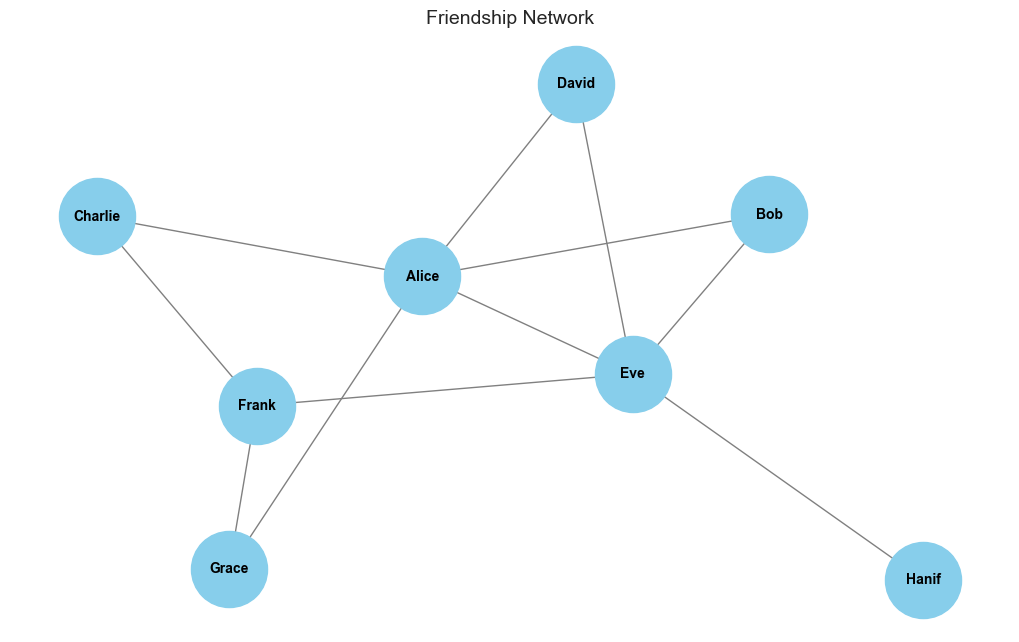

In [15]:
userID = df_users.loc[df_users["name"] == "Alice", "id"].values[0]

findFriends(friendMap, userID)
recommendFriends(friendMap, userID)

add_user(friendMap, 8, 'Hanif', 20, 'Cikarang')
add_friendship(friendMap, 8, 5)

recommendFriends(friendMap, userID)
add_friendship(friendMap, 1, 5)

findFriends(friendMap, userID)
recommendFriends(friendMap, userID)

visualize_friends(friendMap)



In [16]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data pengguna dari CSV
# File users.csv berisi kolom: id, name, age, location
df_users = pd.read_csv("users.csv")

# Membaca data hubungan pertemanan dari CSV
# File friendships.csv berisi kolom: from, to
df_friendships = pd.read_csv("friendships.csv")

# Membuat graph tak berarah (karena pertemanan bersifat dua arah)
friendMap = nx.Graph()

# Menambahkan node (pengguna) ke dalam graf
for _, row in df_users.iterrows():
    friendMap.add_node(row["id"], name=row["name"], age=row["age"], location=row["location"])

# Menambahkan edge (hubungan pertemanan)
for _, row in df_friendships.iterrows():
    friendMap.add_edge(row["from"], row["to"])

# Fungsi untuk menemukan teman langsung
def findFriends(graph, user_id):
    if user_id not in graph:
        print(f"User ID {user_id} not found.")
        return

    currentFriendsID = list(graph.neighbors(user_id))  
    currentfriendsNames = [graph.nodes[x]["name"] for x in currentFriendsID]
    user_name = graph.nodes[user_id]["name"]
    print(f"{user_name} has {len(currentfriendsNames)} friends: {', '.join(currentfriendsNames)}")

# Fungsi untuk merekomendasikan teman berdasarkan teman dari teman
def recommendFriends(graph, user_id):
    if user_id not in graph:
        print(f"User ID {user_id} not found.")
        return

    currentFriendsID = set(graph.neighbors(user_id))
    potentialFriendsID = set()
    
    for friend in currentFriendsID:
        potentialFriendsID.update(graph.neighbors(friend))
    
    potentialFriendsID -= currentFriendsID
    potentialFriendsID.discard(user_id)
    
    potentialFriendsNames = [graph.nodes[f]["name"] for f in potentialFriendsID]
    user_name = graph.nodes[user_id]["name"]
    print(f"Friend recommendations for {user_name}: {', '.join(potentialFriendsNames)}")

# Fungsi untuk menambah pengguna baru ke dalam jaringan
def add_user(graph, user_id, name, age, location):
    if user_id in graph:
        print(f"User {name} (ID {user_id}) already exists.")
        return
    graph.add_node(user_id, name=name, age=age, location=location)
    print(f"Added user: {name} (ID {user_id})")

# Fungsi untuk menambahkan pertemanan baru antara dua pengguna
def add_friendship(graph, user1_id, user2_id):
    if user1_id not in graph or user2_id not in graph:
        print(f"One or both user IDs not found.")
        return
    if graph.has_edge(user1_id, user2_id):
        print(f"{graph.nodes[user1_id]['name']} and {graph.nodes[user2_id]['name']} are already friends.")
        return
    graph.add_edge(user1_id, user2_id)
    print(f"Created friendship between {graph.nodes[user1_id]['name']} and {graph.nodes[user2_id]['name']}")

# Fungsi untuk memvisualisasikan jaringan pertemanan
def visualize_friends(graph):
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    pos = nx.spring_layout(graph, seed=42)
    labels = {node: data['name'] for node, data in graph.nodes(data=True)}
    nx.draw(graph, pos, with_labels=True, labels=labels, node_size=3000, node_color="skyblue", edge_color="gray", font_size=10, font_weight="bold")
    plt.title("Friendship Network", fontsize=14)
    plt.show()

# Fungsi untuk mencari pengguna paling berpengaruh berdasarkan degree centrality
def most_influential_user(graph):
    centrality = nx.degree_centrality(graph)
    most_influential = max(centrality, key=centrality.get)
    name = graph.nodes[most_influential]['name']
    influence_score = centrality[most_influential]
    print(f"Most influential user: {name} (ID {most_influential}) with influence score: {influence_score:.2f}")

# Menghitung PageRank untuk menemukan pengguna paling penting
pagerank = nx.pagerank(friendMap)
most_pagerank = max(pagerank, key=pagerank.get)
print(f"Highest PageRank: {friendMap.nodes[most_pagerank]['name']} - {pagerank[most_pagerank]:.2f}")

# Menghitung Betweenness Centrality
def calculate_betweenness(graph):
    betweenness = nx.betweenness_centrality(graph)
    max_betweenness = max(betweenness, key=betweenness.get)
    print(f"Highest betweenness: {graph.nodes[max_betweenness]['name']} - {betweenness[max_betweenness]:.2f}")

calculate_betweenness(friendMap)


Highest PageRank: Alice - 0.21
Highest betweenness: Alice - 0.33
